In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
x=6*np.random.rand(200,1)-3
y=0.8 * x**2 + 0.9 *x +2 + np.random.randn(200,1)


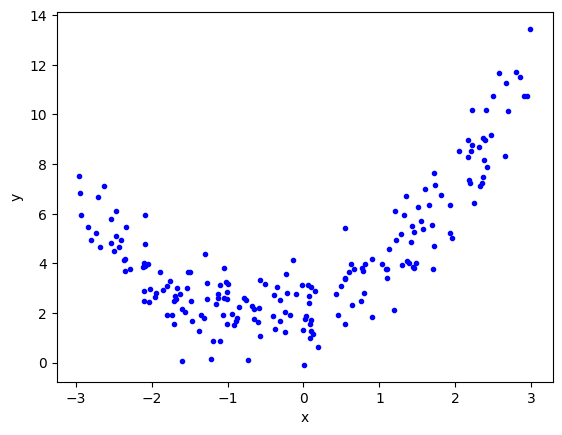

In [ ]:
plt.plot(x,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
lr=LinearRegression()


In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.23002510300441892

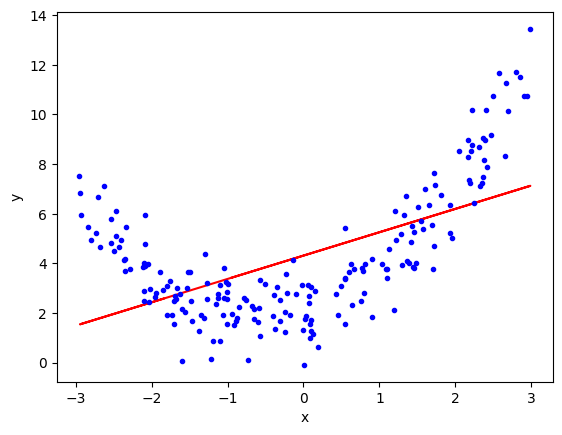

In [ ]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# applying polynomial linear regression degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [ ]:
print(x_train[0])
print(x_train_trans[0])

[-0.9483443]
[ 1.         -0.9483443   0.89935692]


In [ ]:
 lr=LinearRegression()
 lr.fit(x_train_trans,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test_trans)

In [ ]:
r2_score(y_test,y_pred)

0.7853981632955473

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.87993491 0.79863529]]
[2.10252791]


In [ ]:
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new=lr.predict(x_new_poly)

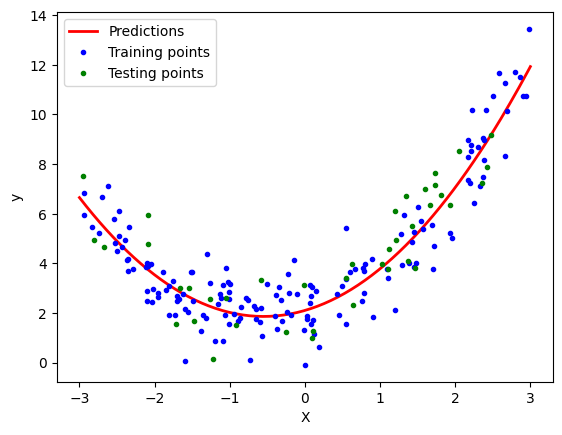

In [ ]:
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(x_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

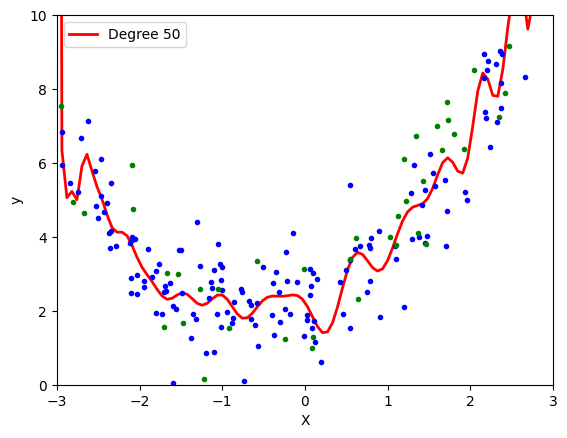

In [ ]:
polynomial_regression(50)

In [ ]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [ ]:

lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [ ]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [ ]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [ ]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [ ]:

print("Input features:", poly.n_features_in_)        # replaces n_input_features_
print("Output features:", X_multi_trans.shape[1])
# print("Output",poly.n_features_out_)          # replaces n_output_features_
print("Powers:\n", poly.powers_)                    # still available


Input features: 2
Output features: 496
Powers:
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [ ]:
X_multi_trans.shape

(100, 496)

In [ ]:
lr=LinearRegression()
lr.fit(X_multi_trans,z)


LinearRegression()

In [ ]:
x_test_multi=poly.transform(final)

In [ ]:
z_final=lr.predict(X_multi_trans).reshape(10,10)


In [ ]:
fig=px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())

In [ ]:
fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()